In [1]:
import numpy as np

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *
from py.learner import *

from SpringRank import SpringRank
from importlib import reload
from scipy.optimize import root

from matplotlib import pyplot as plt

In [7]:
n_rounds = 40
n = 70
m_updates = 200

A = np.random.randint(10, size = (n, n))
A0 = A[0]/A[0].sum()*m_updates

beta = np.array([2.9, -1.5])
lam = .7

In [8]:
L = learner()

L.set_score(
#     score_function = lambda A: A.sum(axis = 0)**.5
    score_function = lambda A: SpringRank.SpringRank(A.T)
)

def quadratic_feature(s):
    S = np.tile(s, (n,1))
    F = (S - S.T)**2
    return(F)
    
L.set_features([
    lambda s: np.tile(s, (n,1)),
    quadratic_feature
])

In [9]:
# generate some fake data

T = L.simulate(beta = beta, 
               lam = lam, 
               A0 = A0,
               n_rounds = n_rounds,
               update = stochastic_update,
               m_updates = m_updates)

In [10]:
# with known parameters, infer the rate matrix from the fake data

L.set_data(T, T[0])
L.compute_state_matrix(lam = lam)
L.compute_score()
L.compute_features()
L.compute_rate_matrix(beta = beta)

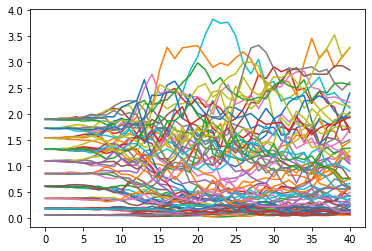

In [11]:
p = plt.plot(L.GAMMA.sum(axis = 1))

In [12]:
# only works since we know true lam
L.ML_pars(b0 = np.array([0,0]))

      fun: 30501.695350502174
 hess_inv: array([[ 0.00547818, -0.00532405],
       [-0.00532405,  0.00523538]])
      jac: array([0.00024414, 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 85
      nit: 15
     njev: 21
   status: 2
  success: False
        x: array([ 3.0047478 , -1.54564881])

In [13]:
res = L.ML(lam0 = .7, 
           alpha0 = 10**(-3), 
           tol = 10**(-3), 
           print_updates = True)

computing memory hyperparameter lambda
Lambda = 0.718090271123583, LL = 30500.775840517297
Lambda = 0.7084760322806687, LL = 30500.728444913144
Lambda = 0.7165946778224679, LL = 30500.683091009472
Lambda = 0.7126423232086381, LL = 30500.588000909134
Lambda = 0.7126327184038643, LL = 30500.58767922633
computing parameter vector beta


In [14]:
H = L.estimate_hessian(res['lam'], res['beta']) # probably takes a while

In [15]:
np.sqrt(np.diag(np.linalg.inv(-H)))

array([0.00847872, 0.0591744 , 0.04887046])

In [16]:
res

{'lam': 0.7126327184038643,
 'beta': array([ 3.039133  , -1.57388699]),
 'LL': -30500.58767922633}